Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw 
inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
import pandas as pd
df = pd.read_csv("D:\\Assignment datasets\\crime_data.csv")
df.shape
df.head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


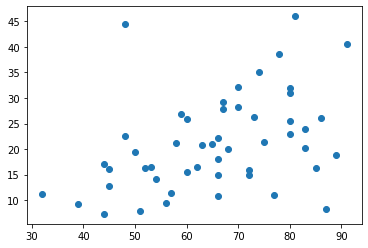

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,3],df.iloc[:,4])
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(df.iloc[:,2:])


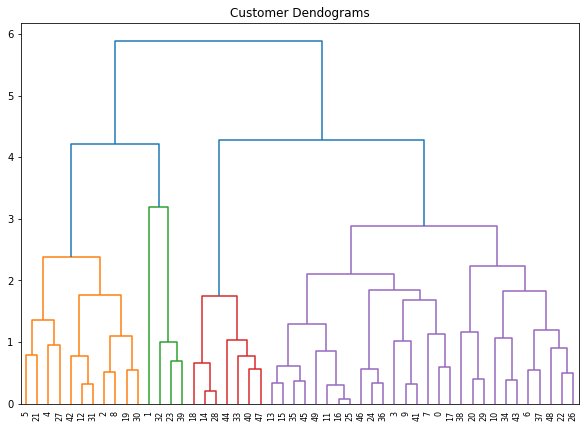

In [4]:
# Agglomerative clustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(SS_X, method='complete')) 

In [5]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
Y = cluster.fit_predict(SS_X)

In [6]:
Y = pd.DataFrame(Y)
Y[0].value_counts()

0    28
1    11
2     7
3     3
4     1
Name: 0, dtype: int64

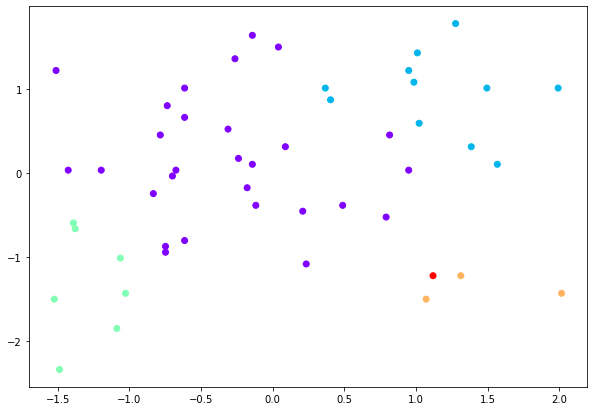

In [7]:
plt.figure(figsize=(10, 7))  
plt.scatter(SS_X[:,0], SS_X[:,1], c=cluster.labels_, cmap='rainbow')  

In [8]:
# K-Means clustering
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=5,n_init=20)
Kmeans.fit(SS_X)
Y = Kmeans.predict(SS_X)

In [9]:
Y = pd.DataFrame(Y)
Y[0].value_counts()

3    15
1    11
2     9
4     8
0     7
Name: 0, dtype: int64

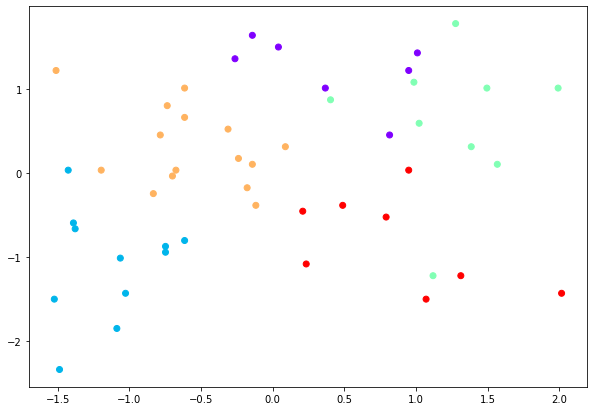

In [10]:
plt.figure(figsize=(10, 7))  
plt.scatter(SS_X[:,0], SS_X[:,1], c=Kmeans.labels_, cmap='rainbow')  

In [11]:
Kmeans.inertia_

39.028830225396476

In [12]:
# Getting the cluster centers
C = Kmeans.cluster_centers_

l1 = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,n_init=20)
    Kmeans.fit(SS_X)
    l1.append(Kmeans.inertia_)
    
print(l1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[150.0, 87.05032788335642, 64.43021557430669, 45.7204093835467, 39.118880575769886, 33.70080993065658, 27.95347868405122, 24.619983921672027, 21.462230227614583, 18.98975296032702]


In [13]:
pd.DataFrame(range(1,11))        
pd.DataFrame(l1)

,0
0,150.000000
1,87.050328
2,64.430216
3,45.720409
4,39.118881
5,33.700810
6,27.953479
7,24.619984
8,21.462230
9,18.989753


In [14]:
pd.concat([pd.DataFrame(range(1,11)),pd.DataFrame(l1)], axis=1)

,0,0
0,1,150.000000
1,2,87.050328
2,3,64.430216
3,4,45.720409
4,5,39.118881
5,6,33.700810
6,7,27.953479
7,8,24.619984
8,9,21.462230
9,10,18.989753


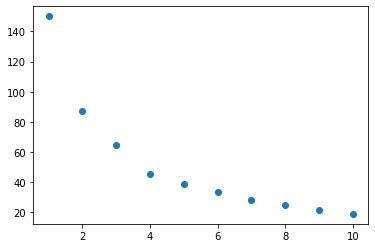

In [15]:
import matplotlib.pyplot as plt
plt.scatter(range(1,11),l1)
plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(SS_X[:, 0], SS_X[:, 1], SS_X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='Red', s=1000) 

C:\Users\Asus NB\AppData\Local\Temp\ipykernel_26688\615568748.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [17]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(SS_X)
dbscan.labels_
df['clusters']=dbscan.labels_
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [18]:
df.groupby('clusters').agg(['mean']).reset_index()

C:\Users\Asus NB\AppData\Local\Temp\ipykernel_26688\4208065720.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('clusters').agg(['mean']).reset_index()


,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.400000,263.666667,73.333333,43.700000
1,0,7.621277,164.829787,65.042553,19.797872


In [19]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df['clusters'],df['UrbanPop'], c=dbscan.labels_)